In [1]:
import pandas as pd
import numpy as np

C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df=pd.read_csv('metal_binding_data.csv')

In [3]:
df.head()

,Unnamed: 0,PID,SEQUENCE,SITES,METAL
0,0,C7C422,MELPNIMHPVAKLSTALAAALMLSGCMPGEIRPTIGQQMETGDQRF...,"1,2,3,4,5,6","Zinc 1,Zinc 1,Zinc 2,Zinc 1,Zinc 2,Zinc 2"
1,1,Q07009,MAGIAMKLAKDREAAEGLGSHERAIKYLNQDYETLRNECLEAGALF...,"89,91,96,175,229,230,292,299,319,323,542,545,5...","Calcium 3,Calcium 3,Calcium 3,Calcium 3,Calciu..."
2,2,P09871,MWCIVLFSLLAWVYAEPTMYGEILSPNYPQAYPSEVEKSWDIEVPE...,NaN,NaN
3,3,P00917,MAHSDWGYDSPNGPZEWVKLYPIANGNNQSPIDIKTSETKHDTSLK...,"95,97,120","Zinc 1,Zinc 1,Zinc 1"
4,4,Q9ULX7,MLFSALLLEVIWILAADGGQHWTYEGPHGQDHWPASYPECGNNAQS...,NaN,NaN


In [4]:
df2=df.dropna(axis=0)

In [5]:
final_df=df2[(df2['SEQUENCE'].str.len()>50) & (df2['SEQUENCE'].str.len()<1000)]

In [6]:
final_df

,Unnamed: 0,PID,SEQUENCE,SITES,METAL
0,0,C7C422,MELPNIMHPVAKLSTALAAALMLSGCMPGEIRPTIGQQMETGDQRF...,"1,2,3,4,5,6","Zinc 1,Zinc 1,Zinc 2,Zinc 1,Zinc 2,Zinc 2"
1,1,Q07009,MAGIAMKLAKDREAAEGLGSHERAIKYLNQDYETLRNECLEAGALF...,"89,91,96,175,229,230,292,299,319,323,542,545,5...","Calcium 3,Calcium 3,Calcium 3,Calcium 3,Calciu..."
3,3,P00917,MAHSDWGYDSPNGPZEWVKLYPIANGNNQSPIDIKTSETKHDTSLK...,"95,97,120","Zinc 1,Zinc 1,Zinc 1"
11,11,P51399,MPSYTVTVATGSQWFAGTDDYIYLSLIGSAGCSEKHLLDKAFYNDF...,"17,18,19,44,45,47,79,80","Calcium 1,Calcium 2,Calcium 2,Calcium 2,Calciu..."
17,17,P00433,MHFSSSSTLFTCITLIPLVCLILHASLSDAQLTPTFYDNSCPNVSN...,"73,76,78,80,82,94,201,252,255,260","Calcium 1,Calcium 1,Calcium 1,Calcium 1,Calciu..."
...,...,...,...,...,...
101350,101350,Q3SFS6,MHTGTTLTQFIIEEQRRTAGATGDFTSLLNDVVTACKAISNAVNKG...,"92,114,114,116,117,200","Magnesium 1,Magnesium 1,Magnesium 2,Magnesium ..."
101351,101351,Q82WY3,MHTGTTLTQFIIEEQRHIAGASGDFTALLNDIVTAIKTISNAVNKG...,"92,114,114,116,117,200","Magnesium 1,Magnesium 1,Magnesium 2,Magnesium ..."
101352,101352,A5WGK6,MTSLTQYFEQHPKLPQTQAVIDVITTITNVGKQITDLLRQGALADI...,"87,106,106,108,109,200","Magnesium 1,Magnesium 1,Magnesium 2,Magnesium ..."
101353,101353,A5WA74,MSRVTLSRYLIEQTRSNNTPADLRFLIEVVARACKEISHHVSKGAL...,"90,112,112,114,115,200","Magnesium 1,Magnesium 1,Magnesium 2,Magnesium ..."


In [7]:
embedded_sequence1=np.load('5000_sequence_emb.npy')
embedded_sequence2=np.load('5000_10000sequence.npy')
embedded_sequence3=np.load('10000_15000sequence.npy')
embedded_sequence4=np.load('15000_18000sequence.npy')
embedded_sequence11=np.vstack((embedded_sequence1, embedded_sequence2))
embedded_sequence12=np.vstack((embedded_sequence11, embedded_sequence3))
embedded_sequence=np.vstack((embedded_sequence12, embedded_sequence4))

In [8]:
embed_df=pd.DataFrame(embedded_sequence)

In [9]:
embed_df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.151012,0.025462,0.092429,-0.256249,0.239549,-0.029207,-0.073871,0.014977,-0.069311,-0.149382,...,-0.036657,-0.071545,-0.072648,-0.114706,0.029023,-0.191004,-0.100229,-0.048354,-0.079151,0.044815
1,0.122567,0.055531,0.070297,-0.139994,0.230209,-0.031499,-0.130309,0.001425,-0.058127,-0.143161,...,-0.214533,0.068443,-0.118156,-0.059025,-0.066420,-0.153984,-0.062088,-0.110761,-0.025862,-0.013535
2,-0.008085,0.012736,0.029693,-0.199478,0.123863,-0.013290,-0.043348,0.034452,0.048009,-0.051582,...,-0.005120,0.029113,-0.182593,-0.068417,0.057323,-0.050070,-0.003117,-0.074684,0.014652,0.074056
3,0.110859,0.062423,0.083022,-0.148900,0.240806,-0.024647,-0.127314,0.023879,-0.051312,-0.131657,...,-0.211213,0.078674,-0.116646,-0.069103,-0.080307,-0.131673,-0.062533,-0.105250,-0.017732,0.009245
4,0.163223,0.028696,0.090046,-0.203717,0.212361,-0.027106,-0.092930,0.029966,-0.051177,-0.125489,...,-0.059654,-0.041873,-0.097212,-0.149042,0.030530,-0.209879,-0.102101,-0.059385,-0.032278,0.052672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18526,0.049532,0.027789,0.066767,-0.157312,0.087491,-0.043455,-0.073456,-0.004851,0.014098,-0.035733,...,0.064848,-0.052299,-0.077648,-0.088557,0.079791,-0.021760,-0.039156,-0.043622,-0.044380,0.017151
18527,0.035520,0.026602,0.078778,-0.140340,0.093269,-0.053398,-0.077948,0.005730,0.016121,-0.047846,...,0.040799,-0.038636,-0.075635,-0.074364,0.076229,-0.006556,-0.031022,-0.036749,-0.046844,0.004497
18528,0.085305,0.031297,0.066893,-0.222964,0.134495,-0.049089,-0.051921,0.007171,-0.018670,-0.076407,...,0.056433,-0.036400,-0.087436,-0.138851,0.062230,-0.076920,-0.051881,-0.033386,-0.065708,0.004687
18529,0.077733,0.020433,0.028500,-0.208900,0.212214,-0.001516,-0.055806,-0.027747,-0.060613,-0.077471,...,0.113348,-0.103888,0.004527,-0.161132,0.083336,-0.114385,-0.115503,-0.034914,-0.063022,0.073735


In [56]:
def data_preparation(embedded_sequence,site,metalss):
  X=[]
  binding_sites=[]
  Y=[]

  embeds=list(embedded_sequence)
  sites=list(site)
  metal=list(metalss)

  for i in range(len(sites)):

    embed=embeds[i]

    sitess=[int(j) for j in sites[i].split(',')]
    print(sitess)
    metals=[j.strip() for j in metal[i].split(',')]

    X=X+[embed]*len(sitess)
    binding_sites=binding_sites+sitess
    Y=Y+metals

  return pd.DataFrame({'embedding':X, 'site':binding_sites,'metal':Y})

In [57]:
embedding_df=data_preparation(embedded_sequence,final_df['SITES'],final_df['METAL'])
embedding_df.head(10)

[1, 2, 3, 4, 5, 6]
[89, 91, 96, 175, 229, 230, 292, 299, 319, 323, 542, 545, 547, 552, 585, 587, 589, 591, 596, 615, 617, 619, 621, 626, 658, 661]
[95, 97, 120]
[17, 18, 19, 44, 45, 47, 79, 80]
[73, 76, 78, 80, 82, 94, 201, 252, 255, 260]
[65, 68, 70, 72, 74, 192, 236, 239, 242, 244]
[260, 263, 280, 283, 286, 0, 0, 0]
[18, 51, 51, 54, 93, 127, 127, 130]
[60, 82, 83, 113, 116, 119, 127, 185]
[31, 33, 35, 42, 63, 65, 67, 69, 74, 100, 102, 104, 106, 111, 141, 143, 145, 147, 152]
[41, 43, 45, 52, 118, 120, 122, 124, 129, 155, 157, 159, 161, 166]
[13, 15, 17, 19, 24, 47, 49, 51, 53, 58]
[149, 152, 166, 169, 188, 0, 0, 0]
[84, 86, 88, 90, 95, 128, 130, 132, 139]
[57, 87, 87, 90, 139, 171, 171, 174]
[462, 464, 466, 468, 473, 0, 0, 0, 0, 0]
[89, 89, 95, 95]
[508, 511, 520, 525, 530, 0, 0, 0]
[67, 67, 71, 71]
[60, 90, 90, 93, 142, 174, 174, 177]
[385, 387, 604, 604, 608, 0, 0, 0, 0]
[191, 191, 195, 227, 231]
[191, 191, 195, 227, 231]
[191, 191, 195, 227, 231]
[152, 157, 157, 189]
[556, 556, 560

[363, 365, 367, 369, 374, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[398, 400, 402, 404, 409, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[373, 375, 377, 379, 384, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[213, 224, 224, 290, 319, 0, 0]
[5, 8, 21, 24, 29, 32, 50, 53]
[152, 154, 172, 174, 177, 0, 0]
[101, 103, 141, 143, 463, 0, 0, 0, 0, 0, 0, 0]
[18, 51, 51, 54, 94, 127, 127, 130]
[62, 377, 379]
[22, 24, 64, 64, 94, 164, 203, 205]
[80, 394, 396]
[62, 92, 92, 95, 144, 176, 176, 179]
[66, 96, 96, 99, 148, 180, 180, 183]
[83, 103, 103, 105, 106, 200]
[83, 83, 89, 89]
[71, 90, 90, 92, 93, 220]
[65, 70, 70, 102]
[52, 57, 57, 89]
[5, 10, 24, 27, 42, 43, 59, 64, 150, 155, 169, 172, 187, 188, 204, 209]
[5, 10, 24, 27, 42, 43, 59, 64, 150, 155, 169, 172, 187, 188, 204, 209]
[116, 121, 121, 153]
[191, 191, 195, 227, 231]
[191, 191, 195, 227, 231]
[281, 295, 295, 297]
[217, 217, 221, 389, 393]
[528, 528, 532, 532, 672, 0]
[22, 24, 67, 69, 368, 371, 373, 430, 431, 432, 436, 441]
[85, 87, 130, 132

[54, 56, 58, 59, 109, 129, 129, 167]
[12, 62, 403, 407, 444, 445, 462]
[56, 58, 60, 61, 114, 133, 133, 171]
[18, 68, 408, 412, 449, 450, 468]
[11, 61, 399, 403, 440, 441, 458]
[53, 55, 57, 58, 110, 127, 127, 165]
[11, 61, 399, 403, 440, 441, 458]
[53, 55, 57, 58, 110, 127, 127, 165]
[13, 63, 403, 407, 444, 445, 462]
[53, 55, 57, 58, 110, 127, 127, 165]
[54, 56, 58, 59, 111, 130, 130, 168]
[14, 64, 403, 407, 444, 445, 463]
[191, 191, 195, 227, 231]
[100, 105, 105, 137]
[191, 191, 195, 227, 231]
[14, 64, 403, 407, 444, 445, 463]
[13, 63, 402, 406, 443, 444, 462]
[14, 64, 403, 407, 444, 445, 463]
[191, 191, 195, 227, 231]
[194, 194, 198, 230, 234]
[55, 60, 60, 92]
[217, 217, 221, 389, 393]
[191, 191, 195, 227, 231]
[8, 52, 57, 57, 84, 89, 89]
[217, 217, 221, 389, 393]
[52, 57, 57, 89]
[12, 62, 397, 401, 438, 439, 456]
[12, 62, 397, 401, 438, 439, 456]
[217, 217, 221, 389, 393]
[217, 217, 221, 389, 393]
[181, 183, 194, 199, 205, 0, 0, 0]
[192, 192, 196, 228, 232]
[66, 71, 71, 103]
[251, 25

[83, 97, 182, 196]
[83, 97, 182, 196]
[84, 98, 183, 197]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[144, 147, 161, 164, 183, 0, 0, 0]
[206, 248, 248, 250]
[256, 300, 300, 302]
[179, 221, 221, 223]
[179, 221, 221, 223]
[151, 154, 168, 171, 190, 0, 0, 0]
[149, 152, 167, 170, 189, 0, 0, 0]
[71, 134, 134, 136, 137]
[104, 274, 274, 312, 356, 0]
[29, 56, 60, 60]
[40, 245, 293, 318]
[69, 109, 145, 145, 179, 100, 0, 0, 0, 0]
[68, 109, 144, 144, 178, 100, 0, 0, 0, 0]
[71, 111, 147, 147, 181, 100, 0, 0, 0, 0]
[68, 109, 144, 144, 178, 100, 0, 0, 0, 0]
[55, 57, 59, 60, 115, 132, 132, 170]
[52, 54, 56, 57, 107, 128, 128, 166]
[69, 109, 145, 145, 179, 100, 0, 0, 0, 0]
[69, 109, 145, 145, 179, 100, 0, 0, 0, 0]
[69, 110, 145, 145, 179, 100, 0, 0, 0, 0]
[69, 110, 145, 145, 179, 100, 0, 0, 0, 0]
[69, 109, 145, 145, 179, 100, 0, 0, 0, 0]
[89, 112, 112, 114, 115, 200]
[199, 211,

[178, 180, 217, 217, 333, 0, 0]
[50, 72, 103, 106, 109, 117, 165]
[8, 10, 49, 49, 84, 156, 187, 189]
[211, 211, 212, 328, 387]
[48, 70, 101, 104, 107, 115, 164]
[501, 504, 512, 515, 521, 0, 0, 0]
[84, 84, 85, 285, 344]
[171, 171, 204]
[256, 256, 257, 512, 575]
[93, 93, 94, 296, 339]
[111, 111, 112, 279, 322]
[72, 72, 73, 234, 273]
[57, 57, 58, 272, 320]
[69, 69, 70, 231, 270]
[100, 100, 101, 262, 301]
[57, 57, 58, 272, 320]
[86, 86, 87, 287, 346]
[77, 77, 78, 261, 307]
[64, 64, 65, 269, 329]
[514, 514, 515, 643, 710]
[75, 75, 76, 240, 279]
[66, 66, 67, 270, 329]
[69, 69, 70, 231, 270]
[254, 254, 255, 384, 451]
[78, 78, 79, 268, 315]
[93, 93, 97, 97]
[88, 88, 89, 289, 348]
[128, 128, 132, 132, 252]
[97, 97, 98, 299, 345]
[69, 69, 70, 281, 327]
[103, 103, 104, 329, 375]
[170, 170, 171, 343, 382]
[149, 149, 150, 337, 402]
[80, 80, 81, 301, 347]
[137, 137, 138, 299, 338]
[95, 95, 96, 307, 353]
[138, 138, 139, 397, 448]
[79, 79, 80, 210, 283]
[158, 158, 159, 321, 367]
[113, 113, 114, 287, 3

[64, 94, 94, 97, 146, 178, 178, 181]
[64, 378, 380]
[61, 376, 378]
[61, 376, 378]
[146, 148]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[80, 94, 179, 193]
[84, 98, 183, 197]
[84, 98, 183, 197]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[75, 89, 174, 188]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[88, 102, 189, 203]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97]
[83, 97, 182, 196]
[37, 51]
[83, 97, 182, 196]
[71, 111, 148, 148, 182, 100, 0, 0, 0, 0]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[84, 98, 183, 197]
[84, 98, 183, 197]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 1

[13, 15, 99, 99, 136, 174, 247]
[78, 102, 250]
[176, 176, 180, 180, 538, 0, 0, 0]
[144, 146, 148, 149, 217, 0, 0, 0]
[73, 73, 75, 75, 77, 77, 79, 79, 81, 81, 84, 84, 109, 109, 111, 111, 113, 113, 115, 115, 120, 120, 157, 159, 161, 163, 168]
[354, 370, 370, 374, 374, 0, 0]
[68, 72, 75, 75, 81]
[62, 66, 69, 69, 75]
[65, 69, 72, 72, 78]
[47, 49, 128, 128, 159, 198, 264]
[160, 160, 193]
[170, 170, 203]
[125, 157, 157, 192, 218, 0]
[195, 195, 196, 435, 498]
[139, 139, 172]
[102, 102, 103, 317, 363]
[17, 19, 103, 103, 140, 178, 251]
[199]
[17, 19, 103, 103, 140, 178, 251]
[180, 180, 181, 362, 426]
[252, 252, 253, 383, 449]
[132, 132, 133, 295, 334]
[94, 118, 269, 558]
[117, 141, 293, 557]
[117, 141, 293, 557]
[88, 112, 268, 534]
[93, 117, 268, 529]
[80, 125, 142, 182, 183, 200, 0]
[36, 40, 68, 73, 75, 114, 118, 135, 172, 175, 234, 237]
[89, 89, 90, 276, 322]
[83, 83, 84, 282, 328]
[123, 123, 124, 346, 392]
[69, 69, 70, 231, 270]
[81, 81, 82, 292, 334]
[41, 80, 108, 108, 119, 120]
[41, 80, 10

[63, 65, 67, 68, 141, 211, 211, 269]
[89, 91, 92, 96, 328, 360, 425, 428, 429]
[60, 61, 61, 76, 77, 77, 80, 82]
[90, 91, 91, 96, 126, 127, 127, 130, 132]
[296, 299, 309, 312, 318, 0, 0, 0]
[110, 113, 120, 147, 150, 0]
[110, 113, 120, 147, 150, 0]
[110, 113, 120, 147, 150, 0]
[97, 99, 101, 102]
[66, 68, 94, 94, 126, 175, 250]
[33, 33, 39, 108, 108, 110, 110, 122, 192, 192, 198, 254, 254, 256, 256, 274]
[93, 93, 97, 97, 475, 475, 479, 479]
[96, 96, 97, 267, 310]
[30, 32, 34, 36, 41, 123, 125, 127, 129, 134, 159, 161, 163, 165, 170]
[57, 57, 58, 237, 289]
[63, 63, 64, 233, 282]
[62, 62, 63, 234, 283]
[57, 57, 58, 237, 289]
[62, 62, 63, 230, 279]
[62, 62, 63, 234, 284]
[57, 57, 58, 237, 289]
[92, 92, 308, 347]
[2, 4, 30, 30, 62, 111, 186]
[79, 81, 107, 107, 139, 187, 262]
[61, 63, 89, 89, 121, 170, 245]
[60, 62, 88, 88, 120, 169, 244]
[77, 79, 105, 105, 137, 186, 260]
[63, 65, 91, 91, 123, 172, 247]
[61, 63, 89, 89, 121, 170, 245]
[61, 63, 89, 89, 121, 170, 245]
[62, 64, 90, 90, 122, 171, 

[104, 106, 108, 109]
[65, 67, 156, 156, 183, 246, 321]
[13, 15, 97, 97, 134, 172, 245]
[61, 63, 153, 153, 180, 233, 306]
[59, 61, 151, 151, 178, 231, 304]
[55, 57, 139, 139, 169, 223, 290]
[14, 16, 100, 100, 137, 175, 248]
[60, 62, 152, 152, 179, 232, 305]
[59, 61, 151, 151, 178, 231, 304]
[86, 110, 266, 530]
[59, 61, 151, 151, 178, 231, 304]
[97, 121, 274, 539]
[98, 122, 273, 538]
[82, 106, 252]
[78, 102, 248]
[14, 14, 52, 74, 138]
[10, 10, 48, 70, 134]
[249, 249, 261, 261, 261, 0, 0, 0]
[410, 410, 422, 422, 422, 0, 0, 0]
[91, 121, 121, 124, 184, 200, 0]
[9, 9, 47, 69, 133]
[74, 76, 78, 79, 142, 164, 164, 390]
[61, 63, 65, 66, 151, 219, 219, 278]
[61, 63, 65, 66, 138, 208, 208, 266]
[175, 177, 179, 180, 245, 0, 0, 0]
[193, 193, 235, 264, 338]
[63, 65, 67, 68, 140, 211, 211, 269]
[144, 144, 185, 209, 273]
[60, 62, 64, 65, 140, 209, 209, 269]
[63, 65, 67, 68, 141, 212, 212, 270]
[416, 423, 423]
[415, 422, 422]
[412, 419, 419]
[402, 409, 409]
[412, 419, 419]
[418, 425, 425]
[418, 425, 42

[296, 296, 298, 302, 302, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[49, 52, 62, 65, 71, 75, 83, 87]
[7, 103, 103, 105]
[206, 229, 229, 231, 233, 0, 0, 0]
[105, 128, 128, 130, 132, 0, 0, 0]
[71, 110, 133, 133, 135, 100, 0, 0, 0, 0]
[126, 149, 149, 151, 153, 0, 0, 0]
[108, 147, 181, 183, 185, 0, 0, 0, 0]
[107, 112, 129, 132, 148, 0, 0, 0]
[200, 203, 225, 230, 255, 0, 0, 0]
[335, 337, 348, 350, 390, 0, 0]
[433, 440, 440]
[421, 428, 428]
[415, 422, 422]
[407, 414, 414]
[406, 413, 413]
[409, 416, 416]
[402, 409, 409]
[408, 415, 415]
[458, 458, 461, 466, 466, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[176, 179, 344, 347, 417, 0, 0, 0]
[406, 413, 413]
[406, 413, 413]
[415, 422, 422]
[410, 417, 417]
[415, 422, 422]
[107, 110, 124, 127, 145, 0, 0, 0]
[38, 63, 64, 93, 96, 99, 107]
[38, 63, 64, 93, 96, 99, 107]
[43, 68, 69, 98, 101, 104, 112]
[58, 58, 59, 105, 105]
[103, 103, 104, 344, 390]
[57, 57, 58, 272, 320]
[100, 100, 101, 338, 384]
[41, 80, 108, 108, 119, 120]
[41, 80, 108, 108, 119, 120]
[41, 65, 93, 93, 

[61, 63, 65, 66, 153, 176, 176, 240]
[10, 10, 48, 71, 135]
[10, 10, 48, 70, 134]
[209, 211, 213, 214, 278, 0, 0, 0]
[62, 64, 66, 67, 144, 215, 215, 273]
[409, 416, 416]
[78, 79, 156, 156, 157, 158, 158, 168]
[9, 82, 82, 84]
[49, 52, 62, 65, 71, 75, 83, 87]
[306, 306, 308, 312, 312, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[163, 188, 279]
[176, 181, 198, 201, 217, 0, 0, 0]
[175, 180, 197, 200, 216, 0, 0, 0]
[92, 97, 115, 118, 134, 137, 141, 153]
[138, 176, 176, 179, 229, 0, 0, 0]
[69, 86, 86, 88, 89, 214]
[91, 224, 225, 225]
[36, 36, 37, 194, 233]
[340, 383, 394, 394, 398, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[413, 420, 420]
[408, 415, 415]
[400, 407, 407]
[409, 416, 416]
[414, 421, 421]
[398, 405, 405]
[403, 410, 410]
[409, 416, 416]
[422, 429, 429]
[411, 418, 418]
[417, 424, 424]
[395, 402, 402]
[414, 421, 421]
[402, 409, 409]
[412, 419, 419]
[362, 362, 365]
[412, 412, 414, 421, 421, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[42, 67, 68, 97, 100, 103, 111]
[38, 63, 64, 93, 96, 99, 107]
[38, 63, 64, 

[114, 138, 290, 560]
[107, 131, 287, 557]
[94, 118, 269, 532]
[248, 248, 260, 260, 260, 0, 0, 0]
[248, 248, 260, 260, 260, 0, 0, 0]
[248, 248, 260, 260, 260, 0, 0, 0]
[248, 248, 260, 260, 260, 0, 0, 0]
[70, 101, 101, 104, 164, 100, 0]
[135, 166, 166, 169, 229, 0, 0]
[14, 14, 52, 74, 138]
[11, 11, 49, 71, 135]
[9, 9, 47, 69, 133]
[10, 10, 48, 70, 134]
[21, 21, 59, 81, 147]
[11, 11, 49, 71, 134]
[14, 14, 52, 74, 138]
[23, 23, 25, 181, 186]
[19, 19, 57, 79, 143]
[14, 14, 60, 82, 146]
[10, 10, 48, 70, 134]
[14, 14, 53, 75, 139]
[12, 12, 50, 72, 136]
[10, 10, 48, 70, 134]
[12, 12, 50, 72, 136]
[107, 110, 130, 133, 194, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[10, 10, 48, 70, 134]
[10, 10, 48, 70, 134]
[14, 14, 52, 74, 133]
[9, 9, 47, 69, 133]
[63, 65, 67, 68, 141, 212, 212, 270]
[63, 65, 67, 68, 143, 213, 213, 271]
[208, 210, 212, 213, 277, 0, 0, 0]
[61, 63, 146, 169, 169, 233]
[461, 572, 574, 669]
[291, 294, 307, 309, 312, 0, 0, 0]
[136, 138, 219, 219, 248, 0, 0]
[136, 138, 219, 219, 

[23, 23, 25, 182, 187]
[236, 239, 256, 259, 356, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[18, 18, 56, 78, 142]
[9, 9, 47, 69, 133]
[61, 63, 65, 66, 139, 210, 210, 268]
[74, 76, 78, 79, 142, 164, 164, 390]
[63, 65, 67, 68, 141, 212, 212, 270]
[61, 63, 65, 66, 148, 216, 216, 275]
[81, 83, 85, 86, 150, 172, 172, 399]
[61, 63, 65, 66, 152, 175, 175, 239]
[10, 10, 48, 70, 134]
[9, 9, 47, 69, 133]
[62, 64, 66, 67, 140, 211, 211, 269]
[64, 66, 68, 69, 124, 191, 191, 250]
[228, 235, 247, 251, 258, 0, 0, 0]
[782, 785, 801, 805, 809, 0, 0, 0]
[44, 115, 115, 117]
[60, 62, 64, 66, 71, 136, 138, 140, 142, 147]
[93, 225, 226, 226]
[91, 223, 224, 224]
[85, 217, 218, 218]
[93, 225, 226, 226]
[95, 228, 229, 229]
[91, 224, 225, 225]
[7, 9, 29, 32, 41, 44, 49, 56, 60, 66, 79, 82]
[93, 226, 227, 227]
[104, 134, 134, 137, 197, 0, 0, 0]
[309, 309, 313, 313, 452, 0, 0]
[8, 10, 16, 41, 74, 74, 102, 132, 193, 195]
[232, 268, 268, 271, 296, 0, 0, 0]
[232, 268, 268, 271, 296, 0, 0, 0]
[240, 276, 276, 279, 304, 0, 0, 0]

[138, 143, 160, 163, 179, 0, 0, 0]
[106, 111, 128, 131, 147, 0, 0, 0]
[168, 168, 172, 172]
[329, 331, 342, 344, 384, 0, 0]
[113, 245, 246, 246]
[100, 232, 233, 233]
[101, 233, 234, 234]
[313, 313, 317, 317, 458, 0]
[132, 197, 257, 261, 265]
[105, 105, 532, 532, 536, 0]
[105, 105, 532, 532, 536, 0]
[91, 224, 225, 225]
[140, 178, 178, 181, 231, 0, 0, 0]
[152, 190, 190, 193, 243, 0, 0, 0]
[351, 351, 354]
[357, 357, 360]
[177, 178, 178, 184, 236, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[481, 481, 484]
[134, 137, 145, 148, 153, 0, 0, 0]
[416, 423, 423]
[414, 421, 421]
[400, 407, 407]
[406, 413, 413]
[196, 196, 197, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[22, 25, 27, 30, 33, 34, 37]
[38, 63, 64, 93, 96, 99, 107]
[39, 64, 65, 94, 97, 100, 108]
[93, 226, 227, 227]
[106, 239, 240, 240]
[51, 53, 55, 62, 90, 92, 94, 96, 101]
[67, 98, 98, 101, 158, 192, 195]
[9, 13, 15, 75, 75, 97, 149]
[107, 131, 283, 551]
[94, 118, 269, 533]
[94, 118, 269, 532]
[58, 61, 68, 71, 98, 101, 146, 149]


[92, 225, 226, 226]
[91, 225, 226, 226]
[96, 229, 230, 230]
[134, 136, 217, 217, 246, 0, 0]
[139, 141, 219, 219, 248, 0, 0]
[136, 138, 219, 219, 248, 0, 0]
[134, 136, 217, 217, 246, 0, 0]
[208, 292, 395, 398, 410, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[216, 219, 221, 223, 226, 0, 0, 0, 0, 0, 0]
[73, 75, 77, 79, 84, 109, 111, 113, 115, 120, 159, 161, 163, 165, 170]
[73, 75, 77, 79, 84, 109, 111, 113, 115, 120, 159, 161, 163, 165, 170]
[308, 308, 312, 312, 451, 0, 0]
[102, 234, 235, 235]
[104, 236, 237, 237]
[95, 228, 229, 229]
[102, 235, 236, 236]
[719, 722, 738, 742, 746, 0, 0, 0]
[115, 248, 249, 249]
[139, 141, 222, 222, 251, 0, 0]
[137, 139, 219, 219, 248, 0, 0]
[136, 138, 219, 219, 248, 0, 0]
[134, 136, 217, 217, 246, 0, 0]
[232, 251, 255, 267, 269, 0, 0, 0]
[54, 56, 58, 59, 129, 148, 148, 189]
[9, 11, 37, 37, 73, 105, 127, 129]
[91, 224, 225, 225]
[97, 230, 231, 231]
[93, 226, 227, 227]
[97, 230, 231, 231]
[96, 229, 230, 230]
[94, 227, 228, 228]
[8, 10, 16, 41, 74, 74, 102, 132, 193, 195]
[8,

[129, 129, 135, 135]
[383, 385, 602, 602, 606, 0, 0, 0, 0]
[392, 394, 611, 611, 615, 0, 0, 0, 0]
[379, 379, 383, 383, 531]
[390, 392, 609, 609, 613, 0, 0, 0, 0]
[343, 343, 347, 347, 488, 0]
[8, 10, 16, 41, 74, 74, 102, 132, 193, 195]
[91, 224, 225, 225]
[218, 228, 230, 329, 332, 0]
[90, 225, 226, 226]
[22, 25, 27, 30, 33, 34, 37]
[39, 64, 65, 94, 97, 100, 108]
[74, 77, 148, 154, 286, 289, 383, 390]
[97, 230, 231, 231]
[94, 227, 228, 228]
[93, 226, 227, 227]
[348, 361, 361, 363]
[22, 22, 28, 76, 76, 78, 78, 78, 81, 84, 84]
[87, 120, 120, 155, 184, 300]
[111, 113, 115, 116, 191, 0, 0, 0]
[69, 71, 73, 74, 162, 183, 183, 429]
[88, 90, 92, 93, 181, 202, 202, 443]
[131, 134, 144, 145, 148, 0, 0, 0]
[10, 15, 25, 28, 33, 36, 42, 44, 100, 105, 115, 118, 123, 126, 132, 134]
[10, 13, 24, 27, 85, 88, 99, 102, 150, 153, 164, 167]
[10, 13, 24, 27, 85, 88, 99, 102, 150, 153, 164, 167]
[3, 6, 14, 17, 22, 26, 30, 34]
[313, 316, 328, 331, 337, 0, 0, 0]
[110, 113, 120, 147, 150, 0]
[247, 247, 259, 259, 2

[231, 267, 267, 270, 295, 0, 0, 0]
[180, 216, 216, 219, 244, 0, 0, 0]
[232, 268, 268, 271, 296, 0, 0, 0]
[181, 217, 217, 220, 245, 0, 0, 0]
[38, 40, 62, 65, 85, 88, 93, 101, 105, 114, 127, 130]
[23, 25, 63, 66, 76, 79, 84, 89, 93, 99, 112, 115]
[91, 224, 225, 225]
[94, 227, 228, 228]
[133, 135, 216, 216, 245, 0, 0]
[136, 138, 219, 219, 248, 0, 0]
[287, 290, 314, 317, 322, 0, 0, 0]
[134, 136, 217, 217, 246, 0, 0]
[134, 136, 217, 217, 246, 0, 0]
[203, 287, 391, 394, 406, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[102, 105, 113, 116, 121, 0, 0, 0]
[95, 177, 206, 214, 216, 200, 0, 0, 0]
[95, 177, 206, 214, 216, 200, 0, 0, 0]
[318, 337, 341, 353, 355, 0, 0, 0]
[216, 219, 221, 223, 226, 0, 0, 0, 0, 0, 0]
[95, 177, 206, 214, 216, 200, 0, 0, 0]
[95, 177, 206, 214, 216, 200, 0, 0, 0]
[8, 10, 16, 41, 74, 74, 102, 132, 193, 195]
[7, 9, 15, 40, 73, 73, 101, 131, 192, 194]
[8, 10, 16, 41, 74, 74, 102, 132, 192, 194]
[396, 398, 410, 411, 417, 0, 0, 0, 0, 0, 0, 0]
[110, 113, 120, 147, 150, 0]
[110, 113, 120, 147, 1

[91, 224, 225, 225]
[94, 227, 228, 228]
[91, 224, 225, 225]
[87, 219, 220, 220]
[100, 233, 234, 234]
[94, 227, 228, 228]
[106, 239, 240, 240]
[39, 41, 61, 64, 74, 79, 84, 91, 95, 101, 114, 117]
[182, 205, 214, 367, 371, 0]
[136, 138, 219, 219, 248, 0, 0]
[135, 137, 218, 218, 247, 0, 0]
[141, 143, 224, 224, 253, 0, 0]
[193, 196, 209, 212, 217, 0, 0, 0]
[408, 427, 431, 443, 445, 0, 0, 0]
[163, 163, 165, 301]
[177, 196, 200, 212, 214, 0, 0, 0]
[9, 13, 15, 75, 75, 97, 149]
[58, 60, 152, 152, 179, 232, 305]
[57, 59, 149, 149, 176, 229, 302]
[59, 61, 151, 151, 178, 231, 304]
[17, 19, 103, 103, 140, 178, 251]
[14, 16, 100, 100, 137, 175, 248]
[60, 62, 151, 151, 178, 231, 304]
[17, 19, 103, 103, 140, 178, 251]
[13, 15, 98, 98, 135, 173, 247]
[13, 15, 98, 98, 135, 173, 247]
[56, 58, 148, 148, 175, 228, 301]
[92, 116, 268, 538]
[98, 122, 273, 538]
[94, 118, 269, 533]
[311, 311, 314, 314, 727, 0, 0, 0]
[78, 102, 254, 512]
[251, 251, 263, 263, 263, 0, 0, 0]
[248, 248, 260, 260, 260, 0, 0, 0]
[248,

[338, 351, 351, 353]
[376, 389, 389, 391]
[135, 137, 218, 218, 247, 0, 0]
[140, 142, 219, 219, 248, 0, 0]
[135, 137, 218, 218, 247, 0, 0]
[138, 140, 221, 221, 250, 0, 0]
[135, 137, 218, 218, 247, 0, 0]
[132, 134, 212, 212, 241, 0, 0]
[22, 106, 210, 213, 228, 200, 0]
[21, 24, 26, 28, 31, 34, 85, 86, 88, 100, 101]
[95, 177, 206, 214, 216, 200, 0, 0, 0]
[26, 69, 69, 71]
[232, 268, 268, 271, 296, 0, 0, 0]
[306, 308]
[240, 276, 276, 279, 304, 0, 0, 0]
[307, 309]
[240, 276, 276, 279, 304, 0, 0, 0]
[232, 268, 268, 271, 296, 0, 0, 0]
[232, 268, 268, 271, 296, 0, 0, 0]
[232, 268, 268, 271, 296, 0, 0, 0]
[307, 309]
[231, 267, 267, 270, 295, 0, 0, 0]
[240, 276, 276, 279, 304, 0, 0, 0]
[232, 268, 268, 271, 296, 0, 0, 0]
[232, 268, 268, 271, 296, 0, 0, 0]
[236, 272, 272, 275, 300, 0, 0, 0]
[229, 265, 265, 268, 293, 0, 0, 0]
[232, 268, 268, 271, 296, 0, 0, 0]
[254, 267, 267, 269]
[8, 10, 16, 41, 74, 74, 102, 132, 193, 195]
[8, 10, 16, 41, 74, 74, 102, 132, 193, 195]
[137, 139, 141, 142, 221, 0, 0, 0

[419, 423, 446, 452, 455, 0, 0, 0]
[412, 416, 439, 445, 448, 0, 0, 0]
[99, 101, 103, 105, 110, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[90, 115, 115, 117, 118, 200]
[62, 64, 69, 103, 234, 236, 241, 275]
[158, 160, 187, 187, 219, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[45, 48, 51, 213, 300, 350]
[45, 51, 213, 300, 350]
[337, 337, 341, 341, 482, 0, 0]
[95, 95, 504, 504, 508, 508]
[78, 100, 100, 102, 103, 200]
[76, 107, 107, 110, 169, 200, 0]
[77, 79, 121, 123, 421, 424, 426, 483, 484, 485, 489]
[26, 27, 93, 246, 457, 460]
[26, 27, 93, 246, 457, 460]
[38, 60, 90, 93, 96, 104, 146]
[119, 124, 156, 159, 160, 0, 0, 0, 0]
[120, 125, 157, 160, 161, 0, 0, 0, 0]
[109, 182, 311, 324, 324]
[98, 100, 102, 161, 180, 200]
[97, 99, 101, 160, 179, 221]
[97, 99, 101, 160, 179, 221]
[39, 41, 86, 86, 118, 221, 244]
[39, 41, 93, 93, 125, 227, 250]
[38, 40, 87, 87, 119, 222, 245]
[235, 248, 251, 261, 264, 0, 0, 0]
[317, 320, 329, 332, 337, 0, 0, 0]
[301, 301, 305, 305, 444, 0, 0]
[51, 57, 95, 125, 128, 162

[148, 151, 164, 167, 186, 0, 0, 0]
[149, 152, 165, 168, 187, 0, 0, 0]
[148, 151, 164, 167, 186, 0, 0, 0]
[146, 149, 162, 165, 184, 0, 0, 0]
[152, 155, 169, 172, 195, 0, 0, 0]
[148, 151, 165, 168, 187, 0, 0, 0]
[154, 157, 171, 174, 193, 0, 0, 0]
[154, 157, 171, 174, 193, 0, 0, 0]
[144, 147, 161, 164, 184, 0, 0, 0]
[161, 164, 178, 181, 200, 0, 0, 0]
[169, 172, 185, 188, 211, 0, 0, 0]
[162, 165, 179, 182, 201, 0, 0, 0]
[161, 164, 178, 181, 200, 0, 0, 0]
[169, 172, 185, 188, 211, 0, 0, 0]
[151, 154, 167, 170, 193, 0, 0, 0]
[162, 165, 179, 182, 201, 0, 0, 0]
[170, 173, 186, 189, 212, 0, 0, 0]
[164, 167, 180, 183, 206, 0, 0, 0]
[165, 168, 181, 184, 207, 0, 0, 0]
[161, 164, 178, 181, 200, 0, 0, 0]
[162, 165, 179, 182, 201, 0, 0, 0]
[162, 165, 179, 182, 201, 0, 0, 0]
[162, 165, 179, 182, 201, 0, 0, 0]
[172, 175, 188, 191, 214, 0, 0, 0]
[162, 165, 179, 182, 201, 0, 0, 0]
[148, 151, 165, 168, 187, 0, 0, 0]
[150, 153, 167, 170, 193, 0, 0, 0]
[148, 151, 165, 168, 191, 0, 0, 0]
[146, 149, 163, 166,

[60, 370, 372]
[80, 158, 159, 159, 169]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[64]
[84, 98, 183, 197]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[84, 98, 183, 197]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[97, 111, 198, 212]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[85, 99, 184, 198]
[83, 97, 182, 196]
[48, 62]
[64, 83, 83, 85, 86, 205]
[230, 232, 285, 301, 342, 0, 0, 0]
[213, 215, 268, 284, 325, 0, 0, 0]
[213, 215, 268, 284, 325, 0, 0, 0]
[135, 138, 151, 154, 178, 0, 0, 0]
[165, 168, 182, 185, 208, 0, 0, 0]
[145, 148, 162, 165, 184, 0, 0, 0]
[40, 245, 293, 318]
[40, 245, 293, 318]
[68, 109, 144, 144, 178, 100, 0, 0, 0, 0]


[190, 190, 194, 226, 230]
[435, 508, 508, 510]
[345, 345, 349, 349, 489, 0, 0]
[434, 507, 507, 509]
[679, 681, 683, 684, 685, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[190, 190, 194, 226, 230]
[190, 190, 194, 226, 230]
[192, 192, 196, 228, 232]
[78, 80, 82, 83, 144, 163, 163, 198]
[170, 174, 201, 321, 325, 0]
[257, 269, 269, 302, 330, 0]
[190, 194, 217, 220, 436]
[180, 184, 207, 210, 419]
[8, 10, 41, 41, 78, 113, 194, 196]
[8, 10, 41, 41, 78, 113, 194, 196]
[2, 5, 7, 166, 167, 198]
[21, 25, 46, 48]
[127, 161, 161, 163, 165, 0, 0, 0]
[2, 5, 7, 208, 209, 240]
[130, 155, 155, 157, 159, 0, 0, 0]
[70, 90, 90, 92, 93, 220]
[71, 91, 91, 93, 94, 221]
[121, 162, 162, 164, 165, 0]
[62, 67, 67, 99]
[191, 191, 195, 227, 231]
[217, 217, 221, 389, 393]
[217, 217, 221, 389, 393]
[217, 217, 221, 389, 393]
[556, 556, 560, 560, 700, 0]
[547, 547, 551, 551, 691, 0]
[334, 346, 349, 359, 362, 0, 0, 0]
[189, 207, 207, 246, 273, 0]
[188, 207, 207, 246, 273, 0]
[82, 84, 127, 129, 480, 483, 485, 542, 543, 544, 548]
[132,

[65, 379, 381]
[5, 8, 28, 33, 48, 51, 71, 76]
[60, 375, 377]
[16, 19, 83, 86]
[69, 382, 384]
[83, 97, 182, 196]
[84, 98, 183, 197]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[75, 89, 174, 188]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[75, 89, 174, 188]
[88, 102, 189, 203]
[788, 791, 799, 802, 817, 0, 0, 0]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[84, 98, 183, 197]
[785, 788, 796, 799, 814, 0, 0, 0]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[75, 89, 174, 188]
[83, 97, 182, 196]
[84, 98, 183, 197]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[84, 98, 183, 197]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[75, 108, 108, 143, 171, 300]
[73, 106, 106, 141, 169, 30

[84, 98, 183, 197]
[84, 98, 183, 197]
[83, 97, 182, 196]
[83, 97, 182, 196]
[80, 94, 179, 193]
[83, 97]
[83, 97, 182, 196]
[83, 97, 182, 196]
[82, 96, 183, 197]
[84, 98, 183, 197]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[75, 89, 174, 188]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[43, 45, 64, 94, 97, 100, 108, 173]
[118, 118, 122, 122, 123, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[166, 183]
[307, 307, 311, 311, 451, 0]
[66, 99, 99, 134, 162, 348]
[72, 105, 105, 140, 165, 300]
[66, 99, 99, 134, 162, 348]
[71, 102, 102, 133, 161, 300]
[149, 152, 166, 169, 192, 0, 0, 0]
[147, 150, 164, 167, 190, 0, 0, 0]
[142, 145, 159, 162, 185, 0, 0, 0]
[149, 152, 166, 169, 192, 0, 0, 0]
[177, 219, 219, 221]
[177, 219, 219, 221]
[147, 150, 164, 167, 186, 0, 0, 0]
[143, 146, 159, 162, 181, 0, 0, 0]
[156, 159, 173, 176, 195, 0, 0, 0]
[147, 150, 164, 167, 186, 0, 0, 0]


[392, 394, 396, 481, 485]
[392, 394, 396, 481, 485]
[362, 364, 366, 451, 455]
[362, 364, 366, 451, 455]
[300, 301, 303, 305, 757, 0, 0, 0, 0, 0, 0]
[361, 363, 365, 450, 454]
[362, 364, 366, 451, 455]
[361, 363, 365, 450, 454]
[351, 353, 355, 440, 444]
[419, 421, 423, 508, 512]
[419, 421, 423, 508, 512]
[416, 418, 420, 505, 509]
[416, 418, 420, 505, 509]
[8, 8, 92, 99, 155, 241]
[8, 8, 93, 100, 156, 242]
[8, 8, 93, 100, 156, 242]
[8, 8, 93, 100, 156, 242]
[8, 8, 93, 100, 156, 242]
[228, 231, 243, 246, 252, 0, 0, 0]
[228, 231, 243, 246, 252, 0, 0, 0]
[228, 231, 243, 246, 252, 0, 0, 0]
[80, 84, 84, 223, 227, 231]
[47, 109, 111, 129, 132, 100, 0, 0, 0, 0]
[47, 109, 111, 129, 132, 100, 0, 0, 0, 0]
[47, 109, 111, 129, 132, 100, 0, 0, 0, 0]
[47, 109, 111, 129, 132, 100, 0, 0, 0, 0]
[47, 109, 111, 129, 132, 100, 0, 0, 0, 0]
[47, 109, 111, 129, 132, 100, 0, 0, 0, 0]
[47, 109, 111, 129, 132, 100, 0, 0, 0, 0]
[47, 109, 111, 129, 132, 100, 0, 0, 0, 0]
[47, 109, 111, 129, 132, 100, 0, 0, 0, 0]
[47,

[380, 382, 384, 386, 391, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[269, 274, 274, 292, 351, 0, 0]
[269, 274, 274, 292, 351, 0, 0]
[257, 268, 268, 391, 431, 0]
[270, 275, 275, 293, 352, 0, 0]
[263, 274, 274, 397, 437, 0]
[261, 266, 266, 284, 343, 0, 0]
[262, 267, 267, 285, 344, 0, 0]
[361, 363, 365, 367, 372, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[259, 270, 270, 395, 435, 0]
[264, 269, 269, 287, 346, 0, 0]
[259, 270, 270, 393, 433, 0]
[262, 267, 267, 285, 344, 0, 0]
[262, 267, 267, 285, 344, 0, 0]
[264, 269, 269, 287, 346, 0, 0]
[262, 267, 267, 285, 344, 0, 0]
[259, 270, 270, 393, 433, 0]
[270, 275, 275, 293, 352, 0, 0]
[261, 272, 272, 395, 435, 0]
[270, 275, 275, 293, 352, 0, 0]
[270, 275, 275, 293, 352, 0, 0]
[270, 275, 275, 293, 352, 0, 0]
[338, 340, 342, 349, 374, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[80, 83, 96, 99, 104, 107, 125, 128]
[387, 389, 391, 393, 398, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[382, 384, 386, 388, 393, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 196]
[83, 97, 182, 196]
[82, 96, 183, 197]
[83, 97, 182, 196]
[83, 97, 182, 196]
[84, 98, 183, 197]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[82, 96, 183, 197]
[81, 95, 180, 194]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[84, 98, 197]
[83, 97, 182, 196]
[82, 96, 183, 197]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[83, 97, 182, 196]
[42, 56]
[81, 95, 180, 194]
[75, 89, 174, 188]
[71, 104, 104, 139, 167, 300]
[149, 152, 166, 169, 192, 0, 0, 0]
[149, 152, 166, 169, 192, 0, 0, 0]
[144, 147, 161, 164, 183, 0, 0, 0]
[142, 145, 159, 162, 181, 0, 0, 0]
[145, 148, 161, 164, 183, 0, 0, 0]
[265, 309, 309, 311]
[259, 304, 304, 306]
[149, 152, 166, 169, 188, 0, 0, 0]
[261, 305, 305, 307]
[137, 140, 153, 156, 175, 0, 0, 0]
[144, 147, 161, 164, 183, 0, 0, 0]
[144, 147, 160, 163, 182, 0, 0, 0]
[145, 148, 161, 164, 183, 0, 0, 0]
[34, 87, 159, 161, 180, 182, 234]
[145, 148, 161, 164, 183, 0, 0

[109, 111, 113, 115, 120, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[80, 112, 112, 145, 169, 300]
[90, 90, 219, 223, 227]
[80, 112, 112, 145, 169, 300]
[69, 95, 209, 211, 307]
[63, 89, 203, 205, 300]
[80, 112, 112, 145, 169, 300]
[80, 112, 112, 145, 169, 300]
[80, 112, 112, 145, 169, 300]
[80, 112, 112, 145, 169, 300]
[85, 117, 117, 150, 174, 300]
[78, 115, 142, 182, 218, 200, 0, 0]
[96, 123, 123, 125, 127, 200, 0, 0]
[392, 394, 396, 403, 428, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[137, 139, 157, 159, 162, 0, 0]
[509, 520, 520, 604, 618, 0]
[139, 196, 219, 221, 232, 0, 0, 0, 0]
[415, 426, 426, 524, 538, 0]
[449, 460, 460, 558, 572, 0]
[414, 425, 425, 523, 537, 0]
[180, 219, 219, 222, 270, 0, 0, 0]
[414, 425, 425, 523, 537, 0]
[413, 424, 424, 522, 536, 0]
[136, 175, 175, 178, 227, 0, 0, 0]
[18, 21, 218, 220]
[267, 272, 272, 290, 349, 0, 0]
[449, 460, 460, 558, 572, 0]
[382, 384, 386, 388, 393, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[266, 271, 271, 289, 348, 0, 0

[83, 104, 134, 180, 210]
[86, 106, 136, 178, 208]
[113, 147, 177, 229, 268]
[86, 106, 136, 178, 208]
[81, 102, 132, 178, 208]
[54, 55, 56, 302, 304, 304, 305]
[96, 112, 112, 116, 116, 100]
[96, 112, 112, 116, 116, 100]
[115, 131, 131, 135, 135, 0]
[111, 145, 175, 227, 265]
[59, 60, 61, 307, 309, 309, 310]
[25, 27, 74, 74, 110, 241, 278, 280]
[96, 112, 112, 116, 116, 100]
[33, 34, 34, 39, 85, 85, 86, 87, 87, 93]
[25, 27, 74, 74, 110, 241, 278, 280]
[42, 77, 78, 79, 315, 317, 317, 318]
[47, 82, 83, 84, 320, 322, 322, 323]
[31, 33, 35, 37, 42, 124, 126, 128, 135, 160, 162, 164, 166, 171]
[623, 625, 627, 629, 634, 0, 0, 0, 0, 0]
[184, 222, 222, 224, 224]
[45, 67, 68, 98, 101, 104, 112, 161]
[170, 170, 226, 228, 228, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[323, 325, 661, 661, 665, 0, 0, 0, 0]
[89, 91, 96, 175, 229, 230, 292, 299, 323, 542, 545, 547, 552, 585, 587, 589, 591, 596, 615, 617, 619, 621, 626, 658, 661]
[47, 69, 70, 100, 103, 106, 114, 163]
[29, 31, 40, 40, 108]
[29, 31, 40, 40, 109]
[33, 

[22, 25, 244, 246]
[153, 156, 170, 173, 196, 0, 0, 0]
[388, 390, 392, 399, 424, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[148, 151, 165, 168, 187, 0, 0, 0]
[150, 153, 167, 170, 189, 0, 0, 0]
[147, 150, 164, 167, 186, 0, 0, 0]
[153, 156, 170, 173, 192, 0, 0, 0]
[148, 151, 165, 168, 187, 0, 0, 0]
[148, 151, 165, 168, 187, 0, 0, 0]
[41, 43, 45, 47, 52, 150, 152, 154, 156, 161]
[41, 43, 45, 47, 52, 150, 152, 154, 156, 161]
[147, 150, 164, 167, 186, 0, 0, 0]
[151, 154, 168, 171, 190, 0, 0, 0]
[147, 150, 164, 167, 186, 0, 0, 0]
[37, 39, 41, 43, 48, 146, 148, 150, 152, 157]
[89, 91, 96, 143]
[100, 102, 107, 154]
[100, 102, 107, 154]
[123, 125, 130, 177]
[83, 104, 106, 111, 119]
[167, 167, 173, 229, 229, 0, 0, 0]
[100, 102, 107, 154]
[83, 104, 106, 111, 119]
[58, 88, 88, 91, 140, 172, 172, 175]
[64, 94, 94, 97, 146, 178, 178, 181]
[61, 376, 378]
[61, 376, 378]
[47]
[87, 87, 91, 91, 222, 226, 230]
[211, 211, 215, 215]
[100, 102, 142, 144, 542, 0, 0, 0, 0, 0, 0, 0]
[14, 17, 37, 42, 57, 60, 80, 

,embedding,site,metal
0,"[0.1510121, 0.025462424, 0.09242898, -0.256248...",1,Zinc 1
1,"[0.1510121, 0.025462424, 0.09242898, -0.256248...",2,Zinc 1
2,"[0.1510121, 0.025462424, 0.09242898, -0.256248...",3,Zinc 2
3,"[0.1510121, 0.025462424, 0.09242898, -0.256248...",4,Zinc 1
4,"[0.1510121, 0.025462424, 0.09242898, -0.256248...",5,Zinc 2
5,"[0.1510121, 0.025462424, 0.09242898, -0.256248...",6,Zinc 2
6,"[0.12256728, 0.055530597, 0.07029734, -0.13999...",89,Calcium 3
7,"[0.12256728, 0.055530597, 0.07029734, -0.13999...",91,Calcium 3
8,"[0.12256728, 0.055530597, 0.07029734, -0.13999...",96,Calcium 3
9,"[0.12256728, 0.055530597, 0.07029734, -0.13999...",175,Calcium 3


In [44]:
type(embedding_df['metal'][0])

str

In [45]:
#regex module
import re
metal_list=[]
#original string
#string1 = "Hello!James12,India2020"
for i in embedding_df['metal']:
    
    pattern = r'[0-9]'

# Match all digits in the string and replace them with an empty string
    new_string=re.sub(pattern, '',i)
    metal_list.append(new_string)
#print(new_string)

In [46]:
embedding_df['metal']

0              Zinc 1
1              Zinc 1
2              Zinc 2
3              Zinc 1
4              Zinc 2
             ...     
126544    Magnesium 1
126545    Magnesium 2
126546    Magnesium 1
126547    Magnesium 2
126548    Magnesium 2
Name: metal, Length: 126549, dtype: object

In [47]:
len(set(metal_list))

11

In [48]:
embedding_df.shape

(126549, 3)

In [49]:
def position_embeddings(max_binding_position, d=1024, n=10000):
    P = np.zeros((max_binding_position, d))

    for k in range(max_binding_position):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P

In [50]:
max(embedding_df.site)

963

In [51]:
max_binding_site=max(embedding_df.site)+1
pos_encodings=position_embeddings(max_binding_site)

In [52]:
pos_encodings.shape

(964, 1024)

In [53]:
embedding_df['metal_list']=metal_list
X_X=list(embedding_df.embedding)
Y=list(embedding_df.metal_list)
labels=list(set(metal_list))

In [54]:
n_labels=len(labels)
n_labels

11

In [55]:
X_X=list(embedding_df.embedding)
X_site=list(embedding_df.site)
X_site=list(map(lambda x: pos_encodings[x, :], X_site))
X_and_site=[x+s for x,s in zip(X_X, X_site)]
len(X_and_site)

126549

In [24]:
len(X_and_site[0])

1024

In [25]:
# Loading general data science packages
import pandas as pd
import numpy as np

# For visualization support,we will load matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

# package for random choice generation
import random
from random import sample

# for machine learning tasks,we are loading pytorch and scikit-learn
import sklearn as sk
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import h5py

C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
 embedding_df['metal_list']

0              Zinc 
1              Zinc 
2              Zinc 
3              Zinc 
4              Zinc 
             ...    
126544    Magnesium 
126545    Magnesium 
126546    Magnesium 
126547    Magnesium 
126548    Magnesium 
Name: metal_list, Length: 126549, dtype: object

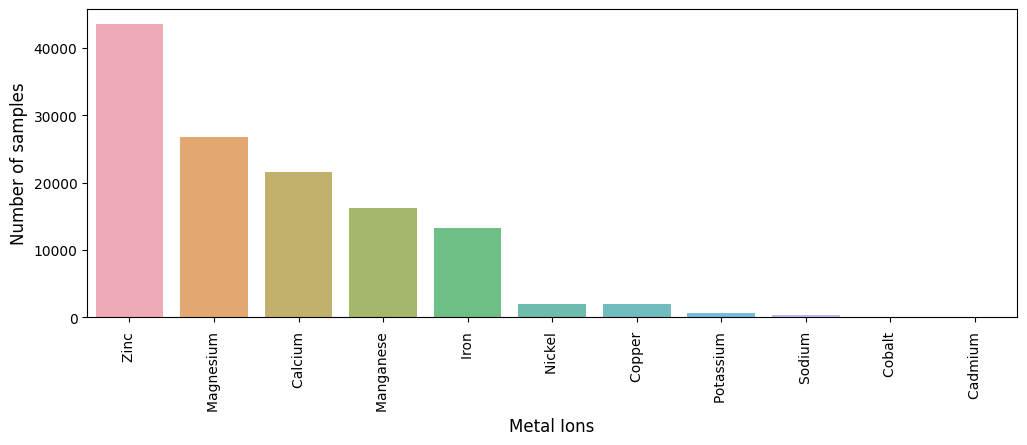

In [27]:
cnt_pro = embedding_df['metal_list'].value_counts()
plt.figure(figsize=(12,4))
#print(cnt_pro)
sns.barplot(x=cnt_pro.index, y=cnt_pro.values, alpha=0.8)
plt.ylabel('Number of samples', fontsize=12)
plt.xlabel('Metal Ions', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [28]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [29]:

X=X_and_site

In [30]:

len(X)
     

126549

In [31]:
X=np.array(X)

In [32]:
Y=np.array(Y)

In [33]:
X.shape[1]

1024

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
encoded_metal=vectorizer.fit_transform(Y)
print(vectorizer.get_feature_names())

['cadmium', 'calcium', 'cobalt', 'copper', 'iron', 'magnesium', 'manganese', 'nickel', 'potassium', 'sodium', 'zinc']


C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
encoded_metal[0].toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [36]:

x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=120, stratify=Y)

In [37]:

model=LogisticRegression(penalty='l2', max_iter=300)
model.fit(x_train, y_train)

C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=300)

In [38]:

cr=classification_report(model.predict(x_test), y_test)
print(cr)

C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Cadmium        0.00      0.00      0.00         0
    Calcium        0.82      0.78      0.80      4558
     Cobalt        0.00      0.00      0.00         0
     Copper        0.37      0.79      0.51       185
       Iron        0.75      0.91      0.82      2180
  Magnesium        0.74      0.74      0.74      5373
  Manganese        0.58      0.78      0.67      2402
     Nickel        0.92      0.96      0.94       382
  Potassium        0.80      0.80      0.80       139
     Sodium        0.03      0.11      0.05        19
       Zinc        0.84      0.73      0.78     10072

    accuracy                           0.76     25310
   macro avg       0.53      0.60      0.55     25310
weighted avg       0.78      0.76      0.77     25310



C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:

m=confusion_matrix(y_test, model.predict(x_test))

In [40]:

def plot_confusion(confusion_mat, unique_labels):

  fig=plt.figure()
  ax=fig.add_subplot(111)
  cax=ax.matshow(confusion_mat)
  fig.colorbar(cax)

  ax.set_xticklabels(['']+unique_labels, rotation=90)
  ax.set_yticklabels(['']+unique_labels)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  plt.show()
     

C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == "__main__":


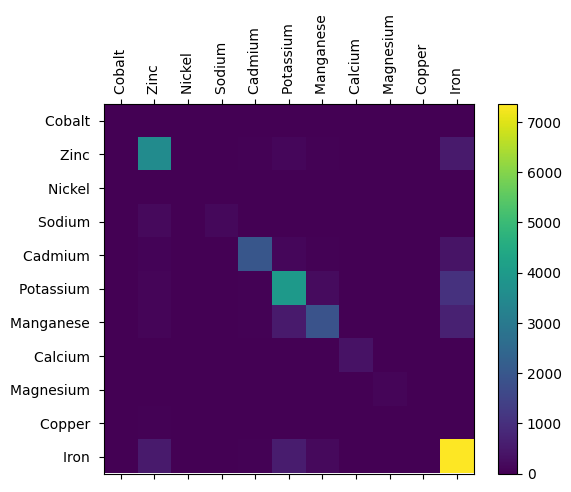

In [41]:

plot_confusion(m, unique_labels=labels)

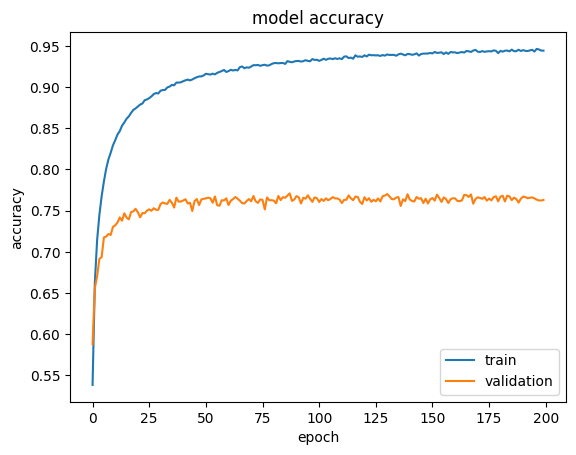

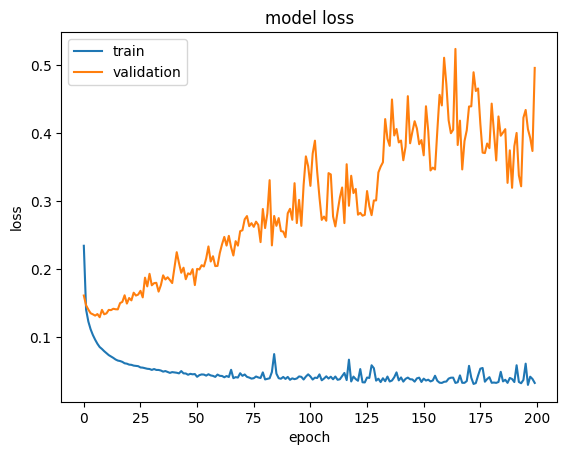

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.79      0.49      0.61      3002
           2       0.00      0.00      0.00        14
           3       0.62      0.74      0.68       125
           4       0.62      0.75      0.68       547
           5       0.70      0.77      0.74      2197
           6       0.69      0.33      0.44      2124
           7       0.99      0.76      0.86       322
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00        39
          10       0.68      0.76      0.72      4285

   micro avg       0.71      0.62      0.66     12655
   macro avg       0.46      0.42      0.43     12655
weighted avg       0.72      0.62      0.65     12655
 samples avg       0.62      0.62      0.62     12655



C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

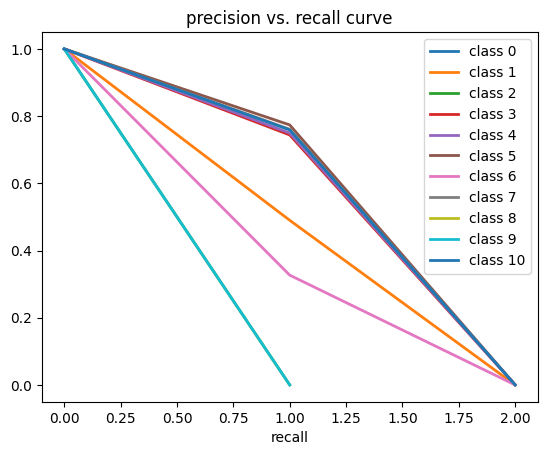

Accuracy is: >0.621


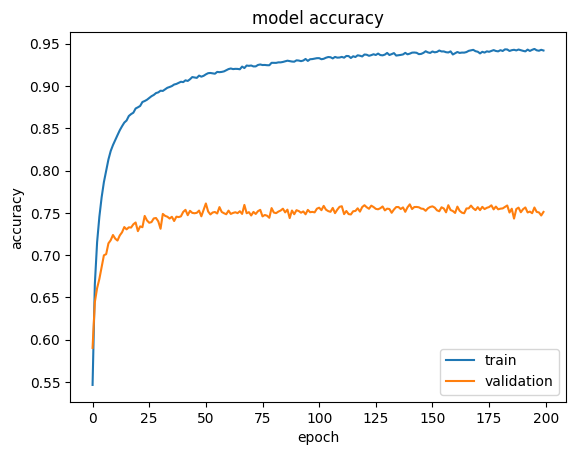

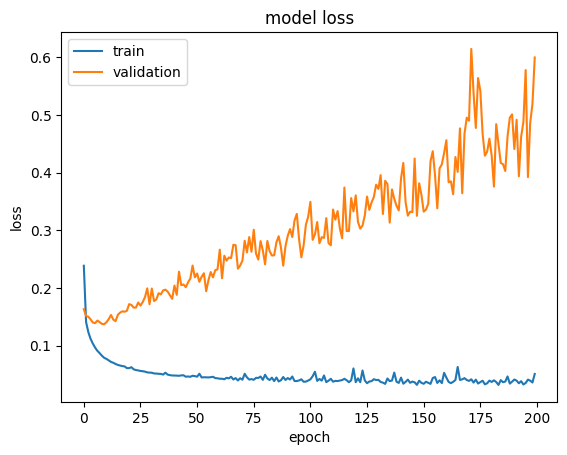

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.77      0.75      0.76      1674
           2       0.00      0.00      0.00        12
           3       0.92      0.50      0.65       397
           4       0.95      0.84      0.89      2584
           5       0.78      0.77      0.78      2485
           6       0.83      0.73      0.78      1783
           7       0.27      0.25      0.26        12
           8       0.85      0.74      0.79        31
           9       0.00      0.00      0.00         9
          10       0.80      0.76      0.78      3668

   micro avg       0.83      0.76      0.79     12655
   macro avg       0.56      0.49      0.52     12655
weighted avg       0.83      0.76      0.79     12655
 samples avg       0.76      0.76      0.76     12655



C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

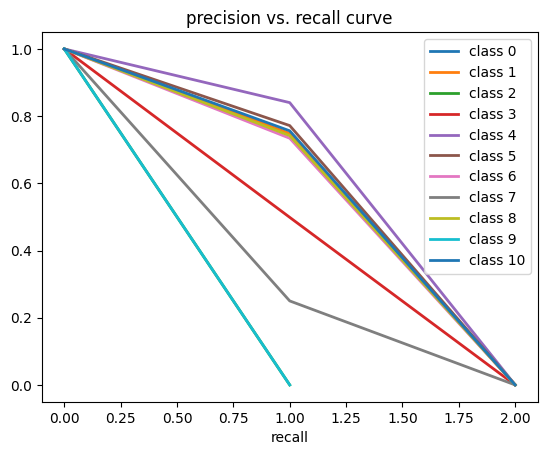

Accuracy is: >0.759


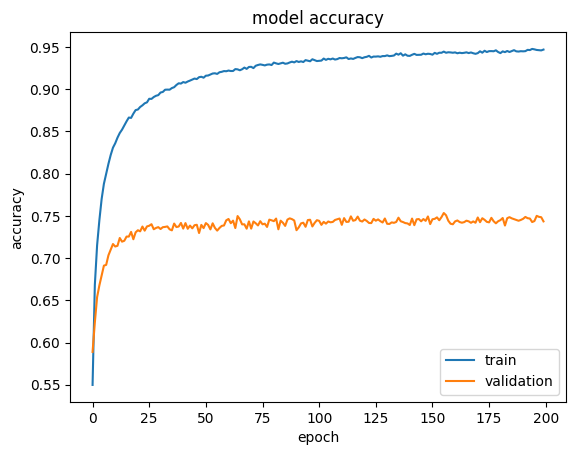

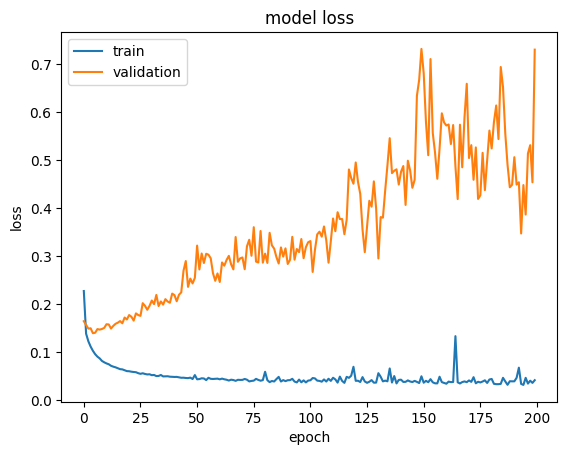

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.83      0.75      0.79      2700
           2       0.00      0.00      0.00         0
           3       0.83      0.66      0.74       196
           4       0.91      0.81      0.86      1471
           5       0.84      0.69      0.76      2446
           6       0.80      0.77      0.79      1500
           7       0.29      0.33      0.31         6
           8       0.91      0.66      0.76        32
           9       0.00      0.00      0.00        11
          10       0.80      0.84      0.82      4285

   micro avg       0.83      0.78      0.80     12655
   macro avg       0.57      0.50      0.53     12655
weighted avg       0.83      0.78      0.80     12655
 samples avg       0.78      0.78      0.78     12655



C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

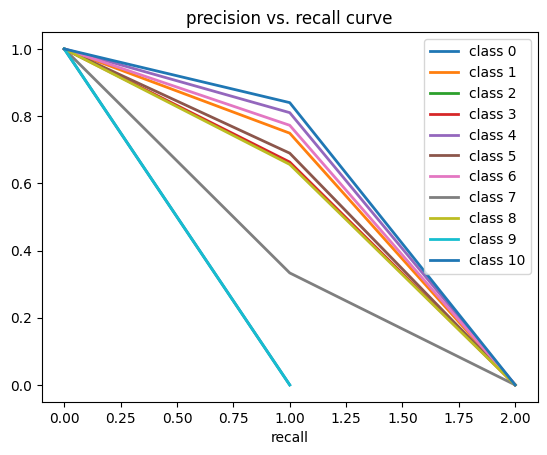

Accuracy is: >0.775


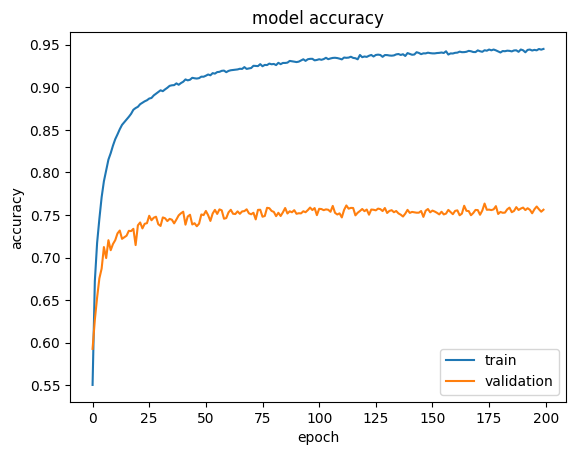

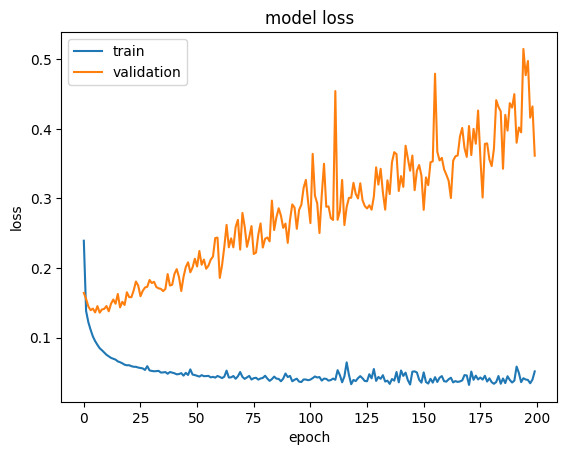

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.80      0.72      0.75      2259
           2       0.00      0.00      0.00         0
           3       0.77      0.55      0.64       272
           4       0.93      0.83      0.88      2008
           5       0.86      0.72      0.79      2568
           6       0.84      0.73      0.78      1648
           7       0.50      0.10      0.17        20
           8       0.96      1.00      0.98        22
           9       0.00      0.00      0.00         0
          10       0.81      0.81      0.81      3858

   micro avg       0.84      0.76      0.80     12655
   macro avg       0.59      0.50      0.53     12655
weighted avg       0.84      0.76      0.80     12655
 samples avg       0.76      0.76      0.76     12655



C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

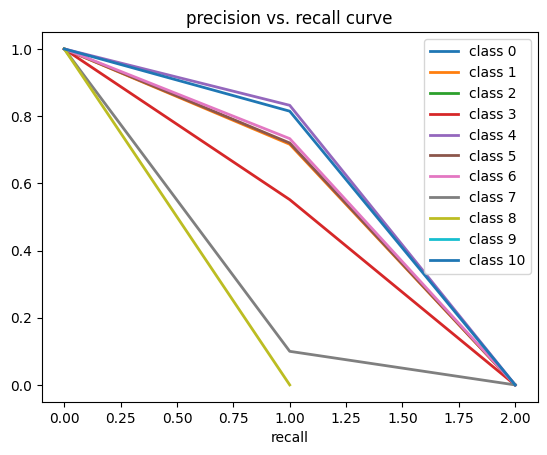

Accuracy is: >0.763


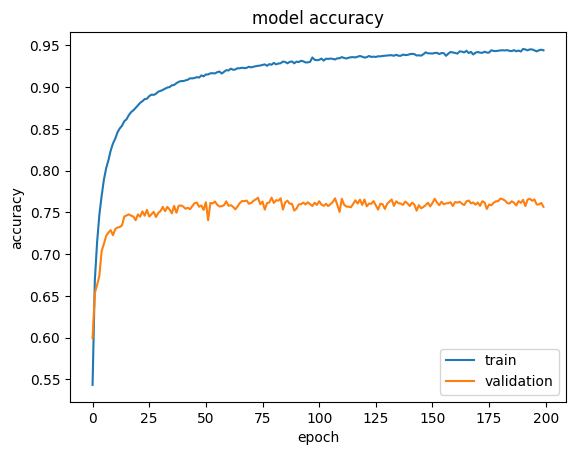

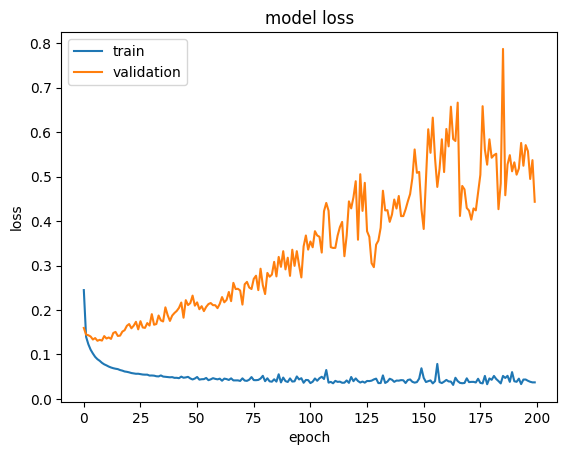

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.79      0.75      0.77      1904
           2       0.00      0.00      0.00         0
           3       0.91      0.65      0.76       268
           4       0.93      0.75      0.83       960
           5       0.77      0.76      0.76      2411
           6       0.87      0.65      0.74      2156
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00        36
          10       0.83      0.80      0.81      4920

   micro avg       0.82      0.75      0.78     12655
   macro avg       0.46      0.39      0.42     12655
weighted avg       0.83      0.75      0.78     12655
 samples avg       0.75      0.75      0.75     12655



C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

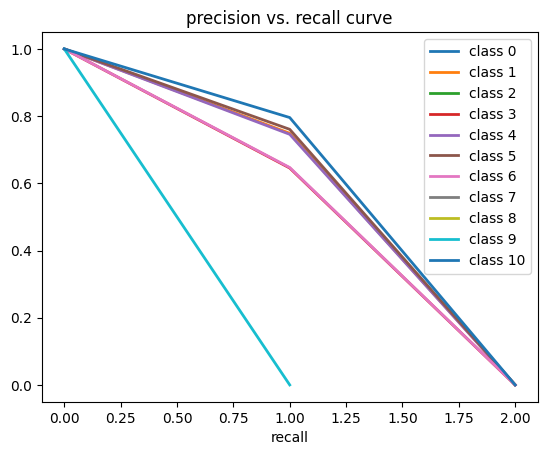

Accuracy is: >0.747


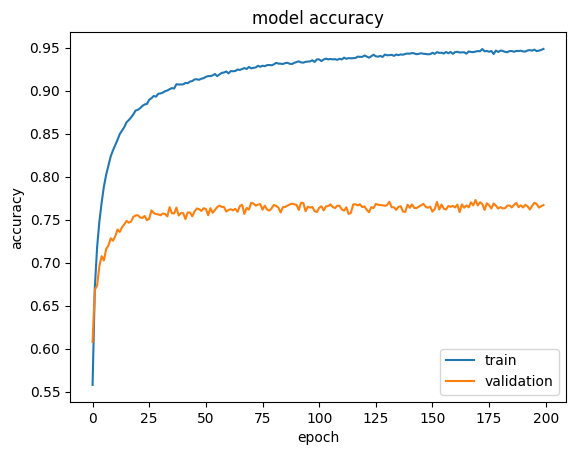

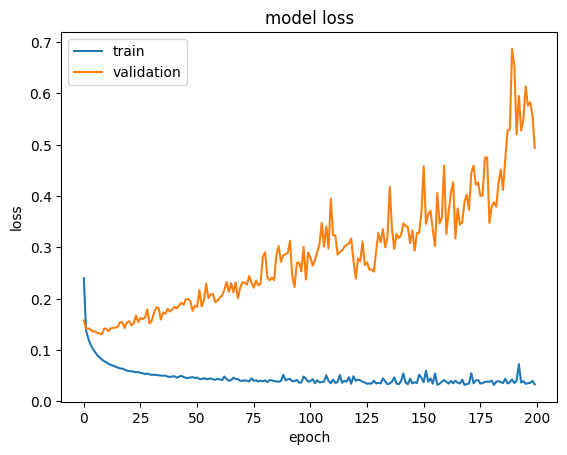

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.78      0.74      0.76      1603
           2       0.00      0.00      0.00         0
           3       0.69      0.72      0.71        82
           4       0.92      0.66      0.77      1012
           5       0.90      0.76      0.82      3589
           6       0.71      0.53      0.61      1199
           7       1.00      0.92      0.96       783
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00        90
          10       0.83      0.83      0.83      4297

   micro avg       0.85      0.75      0.80     12655
   macro avg       0.53      0.47      0.50     12655
weighted avg       0.84      0.75      0.79     12655
 samples avg       0.75      0.75      0.75     12655



C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

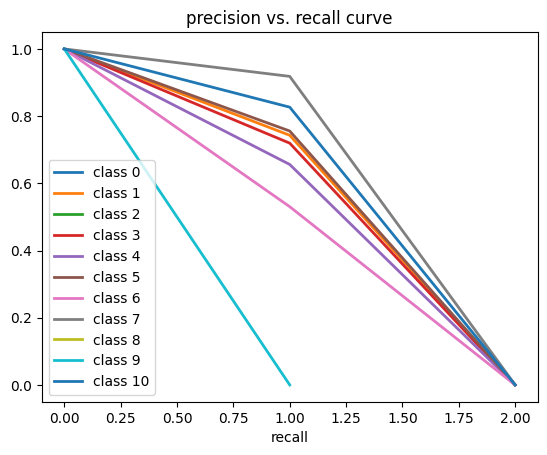

Accuracy is: >0.753


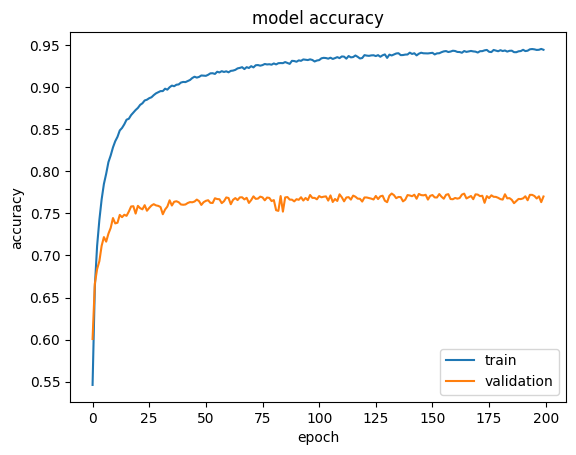

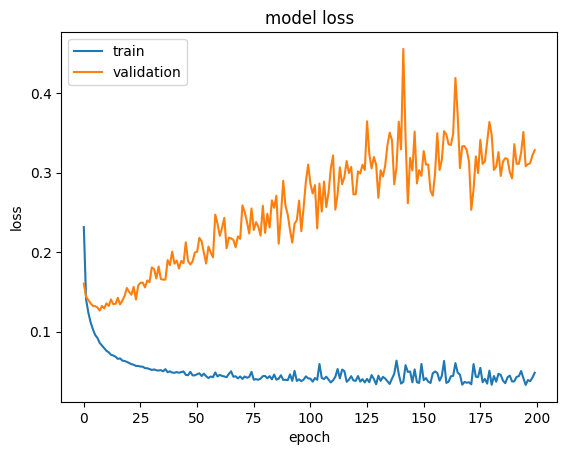

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.76      0.85      0.80      1859
           2       0.00      0.00      0.00        24
           3       0.61      0.56      0.58        45
           4       0.62      0.58      0.60       216
           5       0.90      0.80      0.85      4114
           6       0.68      0.59      0.63       926
           7       1.00      0.93      0.97       497
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00        35
          10       0.88      0.76      0.82      4939

   micro avg       0.85      0.77      0.81     12655
   macro avg       0.50      0.46      0.48     12655
weighted avg       0.85      0.77      0.81     12655
 samples avg       0.77      0.77      0.77     12655



C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

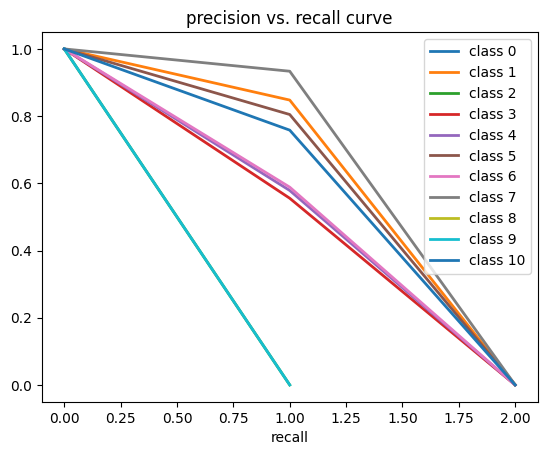

Accuracy is: >0.773


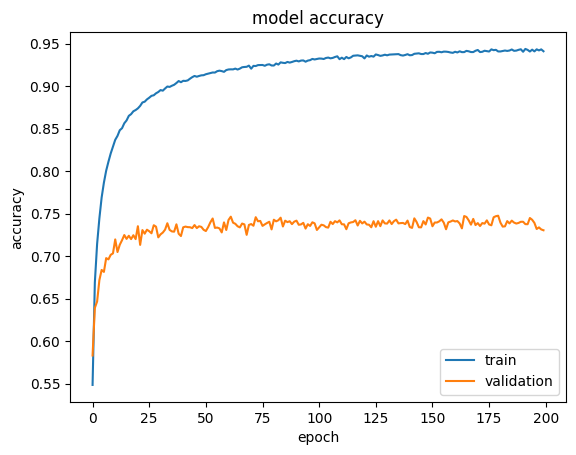

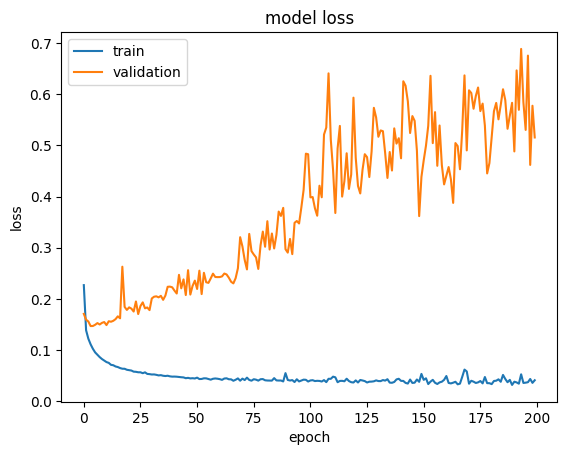

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.84      0.71      0.77      2425
           2       0.00      0.00      0.00         7
           3       0.77      0.63      0.69       191
           4       0.81      0.60      0.69       570
           5       0.71      0.81      0.76      2146
           6       0.80      0.69      0.74      1531
           7       0.99      0.94      0.96       321
           8       1.00      0.19      0.32       217
           9       0.00      0.00      0.00        10
          10       0.87      0.77      0.82      5237

   micro avg       0.82      0.74      0.78     12655
   macro avg       0.62      0.49      0.52     12655
weighted avg       0.83      0.74      0.78     12655
 samples avg       0.74      0.74      0.74     12655



C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

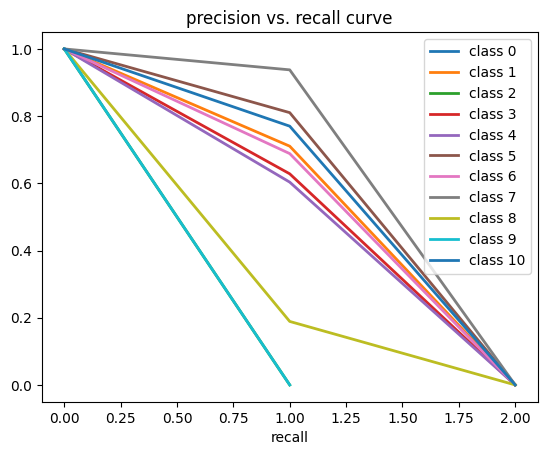

Accuracy is: >0.739


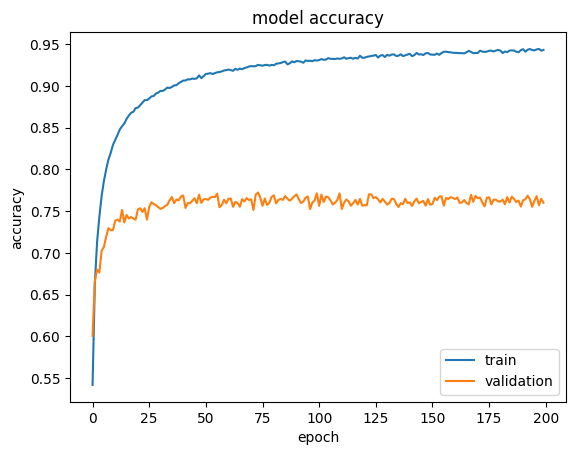

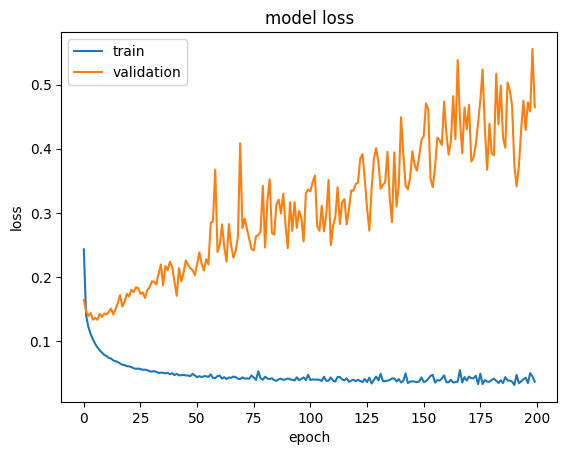

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.77      0.65      0.70      2289
           2       0.00      0.00      0.00         0
           3       0.84      0.58      0.68       276
           4       0.94      0.69      0.80      1731
           5       0.82      0.80      0.81      3078
           6       0.78      0.81      0.79      1478
           7       0.67      0.42      0.51        24
           8       1.00      0.26      0.41       341
           9       0.00      0.00      0.00       114
          10       0.70      0.76      0.73      3324

   micro avg       0.78      0.72      0.75     12655
   macro avg       0.59      0.45      0.49     12655
weighted avg       0.79      0.72      0.74     12655
 samples avg       0.72      0.72      0.72     12655



C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

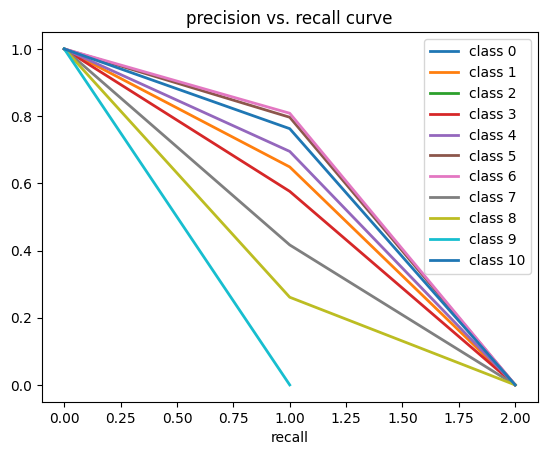

Accuracy is: >0.720


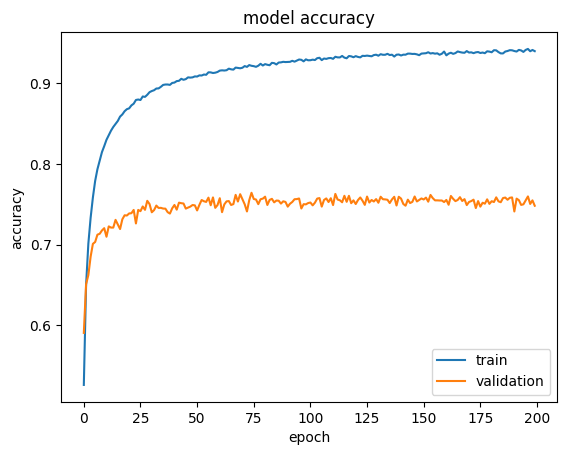

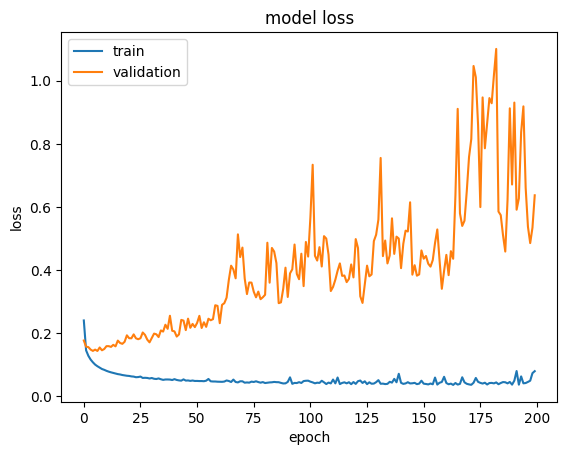

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.74      0.62      0.67      1913
           2       0.00      0.00      0.00        12
           3       0.60      0.54      0.57       102
           4       0.93      0.78      0.85      2141
           5       0.67      0.67      0.67      1778
           6       0.83      0.75      0.79      1871
           7       0.00      0.00      0.00         7
           8       1.00      0.08      0.15        50
           9       0.00      0.00      0.00         0
          10       0.81      0.77      0.79      4780

   micro avg       0.80      0.73      0.76     12654
   macro avg       0.51      0.38      0.41     12654
weighted avg       0.80      0.73      0.76     12654
 samples avg       0.72      0.73      0.72     12654



C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\envs\bio-transformers\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

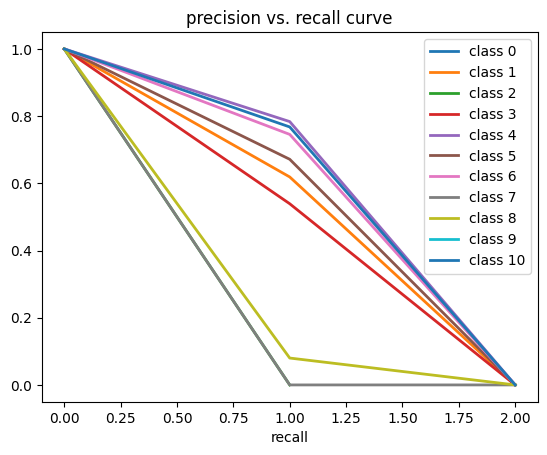

Accuracy is: >0.723
Accuracy: 0.737 (0.043)


In [78]:
# mlp for multi-label classification
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve
 
# get the model
def get_model(n_inputs, n_outputs,sequence_len):
	model = Sequential()
	model.add(Dense(500, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dropout(0.2)) 
	model.add(Dense(300, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(100, activation='relu'))
	out1=model.add(Dense(n_outputs, activation='sigmoid'))
	out2=model.add(Dense(sequence_len, activation='sigmoid'))
	Model=model(inp, [out1,out2])
	Model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
	return Model
 
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y):
	results = list()
	n_inputs, n_outputs = X.shape[1], y.shape[1]
	# define evaluation procedure
	#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	skf = StratifiedKFold(n_splits=10)
	# enumerate folds
	for train_ix, test_ix in skf.split(X,np.zeros(shape=(X.shape[0], 1))):
		# prepare data
		X_train, X_test = X[train_ix], X[test_ix]
		y_train, y_test = y[train_ix], y[test_ix]
		#print(y_test)
		model = get_model(n_inputs, n_outputs)
		# fit model
		history=model.fit(X_train, y_train,validation_split=0.2, verbose=0, epochs=200,)
		#model.save("protein_model.h5")
		plt.plot(history.history['accuracy'])
		plt.plot(history.history['val_accuracy'])
		plt.title('model accuracy')
		plt.ylabel('accuracy')
		plt.xlabel('epoch')
		plt.legend(['train', 'validation'], loc='lower right')
		plt.show()
		# summarize history for loss
		plt.plot(history.history['loss'])
		plt.plot(history.history['val_loss'])
		plt.title('model loss')
		plt.ylabel('loss')
		plt.xlabel('epoch')
		plt.legend(['train', 'validation'], loc='upper left')
		plt.show()
		yhat = model.predict(X_test)
		# round probabilities to class labels
		yhat = yhat.round()
		#print(yhat)
		#print(multilabel_confusion_matrix(y_test, yhat))
		acc = accuracy_score(y_test, yhat)
		print(classification_report(y_test, yhat))
		# precision recall curve
		precision = dict()
		recall = dict()
		for i in range(11):
			precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        yhat[:, i])
			plt.plot(recall[i], lw=2, label='class {}'.format(i))    
		plt.xlabel("recall")
		#plt.ylabel("precision")
		plt.legend(loc="best")
		plt.title("precision vs. recall curve")
		plt.show()
		# store result
		print('Accuracy is: >%.3f' % acc)
		results.append(acc)
	return results
 
# load dataset

# evaluate model
results = evaluate_model(X.astype(np.uint8), encoded_metal.toarray().astype(np.uint8))
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))